### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 8</span>

## <span style="color:blue"> Esercizio 8 </span>
### Scopo
Lo scopo di questo esercizio consiste nell'utilizzare metodi di campionamento stocastico per eseguire calcoli inerenti alla meccanica quantistica. 
Tratteremo il problema di una particella libera (che non intereagisce con altre particelle) in uno spazio monodimensionale 1D, sottoposta ad un potenziale esterno del tipo:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$




La forma del potenziale scritto sopra, è quella a doppia buca (vedi curva nera grafico LSN_Exercises_08). 
Questo tipo di potenziale non è risolvibile analiticamente ma solo tramite metodi numerici, ciò che vorremmo applicare per cercare lo stato fondamentale della particella in questo potenziale è di usare il Metodo MOnte Carlo variazionale.
Immagineremo una famiglia di funzioni parametrizzata da un insieme di parametri variazionali, che approssimi bene a piacere lo stato fondamentale di questo problema quantistico.

Un modello che approssima la funzione d'onda dello stato fondamentale è la seguente funzione d'onda di prova:
    
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

che è proporzionale alla somma di due gaussiane: una centrata in $\mu$ e l'altra in -$\mu$, dove $\mu$ è un parametro variazionale da ottimizzare e di larghezza, deviazione standar $\sigma$ che è anch'essa un parametro variazionale da ottimizzare.
    La $\Psi_T^{\sigma,\mu}(x)$ dipende da due parametri variazionali , $\sigma$, che è la larghezza delle due gaussiane sotto radice quadrata, e $\mu$, che rappresenta la distanza dall'origine dei loro valori medi.
   
Quindi il nostro spazio di parametri è un vettore in uno spazio bidimensionale, a valori reali dobbiamo cercare qual è il punto di minimo. E' stata scelta una forma simmetrica della funzione d'onda, in quanto il problema è simmetrico, il potenziale è pari, quindi ci aspettiamo che la funzione d'onda sia pari. Questa informazione è stata immessa nell'espressione variazionale tentativo della funzione d'onda.

 ### Compilazione
Il codice è salvato nella cartella <font face = "Courier"> ex08.1 </font>. Esso può essere compilato, da shell unix, usando il comando <font face = "Courier"> `$make` </font> ed eseguito con il comando <font face = "Courier"> `$./main.exe` </font>. 
Nel file <font face = "Courier"> 'input.dat' </font> sono impostati i valori inziali di $\mu$ e $\sigma$, il parametro delta dell'algoritmo di Metropolis $\delta$, il numero di blocchi e step per ogni blocco per ogni valutazione dell'energia $\langle H \rangle$, e il limite per l'istogramma.

## <span style="color:blue"> Esercizio 8.1 </span>

NB: Tornando allo scopo dell'esercizio occorre scrivere un codice variazionale Monte Carlo in c++ per una singola particella libera quantistica in una dimensione 1D, che sfrutti l'algoritmo di Metropolis per campionare una funzione d'onda di prova $|\Psi_T(x)|^2$ utilizzando una probabilità di transizione uniforme $T(x_{new}|x_{old})$. Tramite il data blocking, il codice dovrebbe essere in grado di calcolare il valore atteso dell'hamiltoniana:
        
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Ciò equivale a calcolare l'integrale opportunamente normalizzato con il modulo quadro della funzione d'onda: possiamo moltiplicare e dividere per $\Psi_{T}$ in modo tale da avere l'integrale fattorizzato in una densità di probabilità, il termine $\hat{H}*\Psi_{T}(x)/\Psi_{T}(x)$ che rappresenta l'energia locale. Quest'ultima, corrisponde ad applicare la parte cinetica dell'Hamiltoniana ossia il Laplaciano, che la derivata seconda in una dimensione alla $\Psi_{T}$ ma anche a moltiplicare l'energia potenziale alla $\Psi_{T}$.
    
### Tecnica di campionamento dell'integrale
Per calcolare l'integrale applichiamo il metodo dell'Importance Sampling, quindi ne calcoliamo il valore medio generando punti casuali $x$ distribuiti come $|\Psi_{\mu, \sigma}|^2$.

## <span style="color:blue"> Esercizio 8.2 </span>

Nella seconda parte dell'esercizio, dobbiamo applicare il codice variazionale Monte Carlo per trovare i parametri $\sigma$ e $\mu$ che minimizzano $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Qualunque valore di aspettazione con una funzione d'onda tentativo, è maggiore uguale del valore vero dell'energia dello stato fondamentale (per il principio variazionale) e quindi trovando $\sigma$ e $\mu$ che minimizzano l'energia, possiamo avvicinarci a rappresentare tramite la $\Psi_{Trial}$ funzione d'onda tentativo il vero ground state, che non corrisponderà mai al suo valore vero ma si avvicinerà.

### Minimizzazione dell'energia
Per minimizzare l'energia implementiamo un algoritmo del gradiente. Calcoliamo il gradiente per ogni coppia $(\mu, \sigma)$ :

$$
\vec{\nabla} \langle H_{\mu, \sigma} \rangle = \bigg(\frac{\partial \langle H_{\mu, \sigma}\rangle}{\partial \mu}, \frac{\partial \langle H_{\mu, \sigma}\rangle}{\partial \sigma}\bigg) \sim \bigg(\frac{\langle H_{\mu+d\mu, \sigma}\rangle-\langle H_{\mu, \sigma}\rangle}{d\mu}, \frac{\langle H_{\mu, \sigma+d\sigma}\rangle-\langle H_{\mu, \sigma}\rangle}{d\sigma}\bigg) 
$$

e modifichiamo $(\mu, \sigma) \to (\mu,\sigma)-\alpha \vec{\nabla} \langle H_{\mu, \sigma} \rangle $ dove $\alpha$ è un numero reale. In circa 20/25 l'algoritmo converge a:


In [4]:
f= open("ex08.1/parametres.dat","r")
string = f.readlines()
print('mu    = '+string[0])
print('sigma = '+string[1])
print('<H>   = '+string[2])

mu    = 0.838505

sigma = 0.604021

<H>   = -0.437791 pm 0.00664475



 Possiamo usare questi valori per disegnare un istogramma di punti da cui campionare $|\Psi_T(x)|^2$ e per mostrare come la stima di $\langle H_{\mu, \sigma}\rangle$ dipende dagli steps MC.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

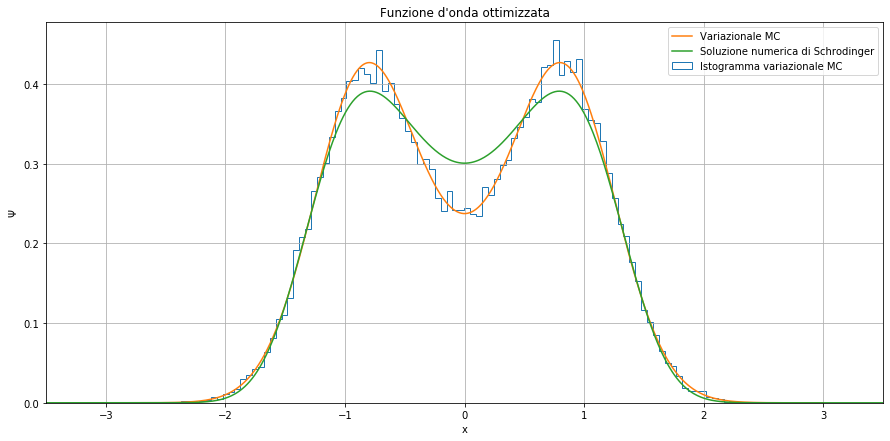

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

plt.rcParams['figure.figsize'] = [15, 7]

data = np.loadtxt("ex08.1/histogram.dat", usecols=(0), unpack='true')
x_= np.linspace(-3.,3., 1000)
mu=float(string[0])
sigma=float(string[1])

normalization1 = quad(lambda x: (np.exp(- (x-mu)**2 / 2 / sigma**2) + np.exp(- (x+mu)**2 / 2 / sigma**2))**2, -20, 20)
plt.hist(data, bins=100, density = True, histtype='step', label='Istogramma variazionale MC')
plt.plot(x_, ((np.exp(- (x_-mu)**2 / 2 / sigma**2) + np.exp(- (x_+mu)**2 / 2 / sigma**2)))**2 / normalization1[0], label='Variazionale MC')
plt.plot(x,(psi[0])**2, label='Soluzione numerica di Schrodinger')
plt.xlabel('x')
plt.ylabel('$\Psi$')
plt.grid(True)
plt.title("Funzione d'onda ottimizzata")
plt.legend()
plt.xlim([-3.5, 3.5])
plt.show()

Ciò che si osserva dal grafico sopra è che la soluzione numerica è leggermente diversa dalla soluzione trovata con il metodo variazionale di Monte Carlo. Questo risultato può essere dovuto al fatto che con una soluzione numerica vediamo la funzione d'onda come un vettore.

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

In questo modo valutiamo la funzione come numero finito di punti, questa semplificazione genera problemi di arrotondamento.

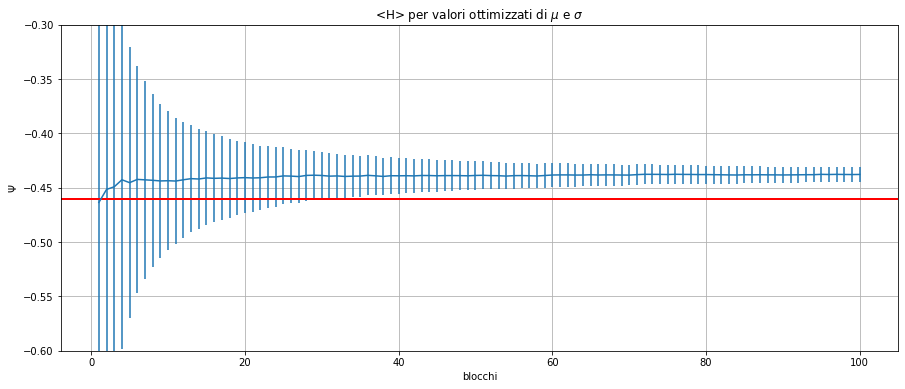

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 6]

x_ene, y_ene, err_ene = np.loadtxt("ex08.1/Energy.dat", usecols=(0,1,2), unpack='true')

plt.errorbar(x_ene, y_ene, yerr=err_ene)
plt.xlabel('blocchi')
plt.ylabel('$\Psi$')
plt.grid(True)
plt.title("<H> per valori ottimizzati di $\mu$ e $\sigma$")
plt.axhline(-0.46046587969271563, color='red', lw=2, label=' Metodo di Schrodinger ')
plt.ylim([-0.6, -0.3])
plt.show()

## <span style="color:blue"> Exercise 8.3</span>

### Scopo
#### Algoritmo PIGS
Scopo dell'esercizio è di utilizzare il codice PIMC/PIGS scaricato dal sito Ariel LSN per studiare lo stesso sistema quantistico (particella quantistica monodimensionale) in 1D , usando l'algoritmo PIGS (per $T=0$) per progettare:
- una funzione d'onda di prova costante, $\Psi_T(x)=1$
- usando $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ con i parametri variazionali ottimizzati.

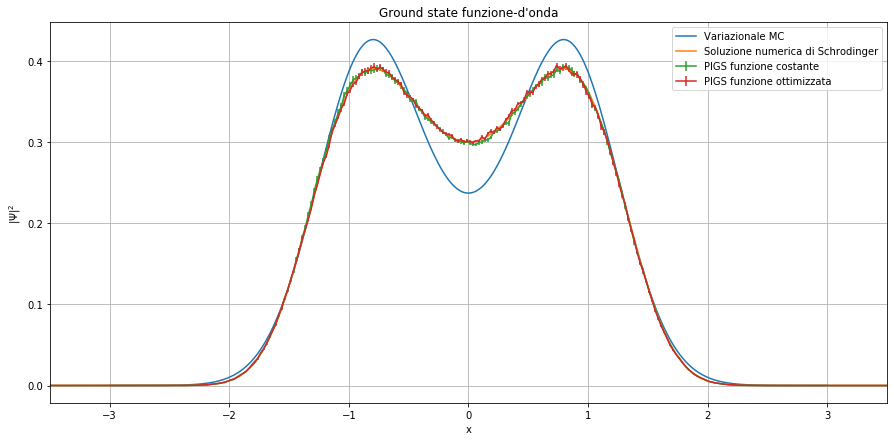

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

plt.rcParams['figure.figsize'] = [15, 7]

x_= np.linspace(-3.,3., 1000)
mu=float(string[0])
sigma=float(string[1])

normalization1 = quad(lambda x: (np.exp(- (x-mu)**2 / 2 / sigma**2) + np.exp(- (x+mu)**2 / 2 / sigma**2))**2, -20, 20)
plt.plot(x_, ((np.exp(- (x_-mu)**2 / 2 / sigma**2) + np.exp(- (x_+mu)**2 / 2 / sigma**2)))**2 / normalization1[0], label='Variazionale MC')
plt.plot(x,(psi[0])**2,label='Soluzione numerica di Schrodinger')
plt.grid(True)
plt.title("Ground state funzione-d'onda")
plt.xlim([-3.5, 3.5])

xconst,yconst, errorconst=np.loadtxt("./QMC_1D/TZeroConst/itp=8/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(xconst,yconst,yerr=errorconst, label='PIGS funzione costante')
xgauss,ygauss, errorgauss=np.loadtxt("./QMC_1D/TZeroGauss/itp=8/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(xgauss,ygauss,yerr=errorgauss, label='PIGS funzione ottimizzata')

plt.xlabel('x')
plt.ylabel('$|\Psi|^2$')
plt.legend()
plt.show()

Dal grafico sopra si osserva che lo stato fondamentale ottenuto con l'algoritmo PIGS coincide quasi perfettamente con la soluzione numerica di Schrodinger, sia nel caso in cui proiettiamo la funzione d'onda costante $\Psi_T(x)=1$, sia con i parametri variazionali ottimizzati $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$

#### Confrontiamo ora i risultati con quelli ottenuti con il nostro codice VMC: usando $\Psi_T^{\sigma,\mu}(x)$, di quanto si può ridurre la propagazione del tempo immaginario rispetto al primo caso?

Per far ciò, ripetiamo lo stesso calcolo precedente utilizzando valori decrescenti per itp ( parametro di propagazione del tempo immaginario).

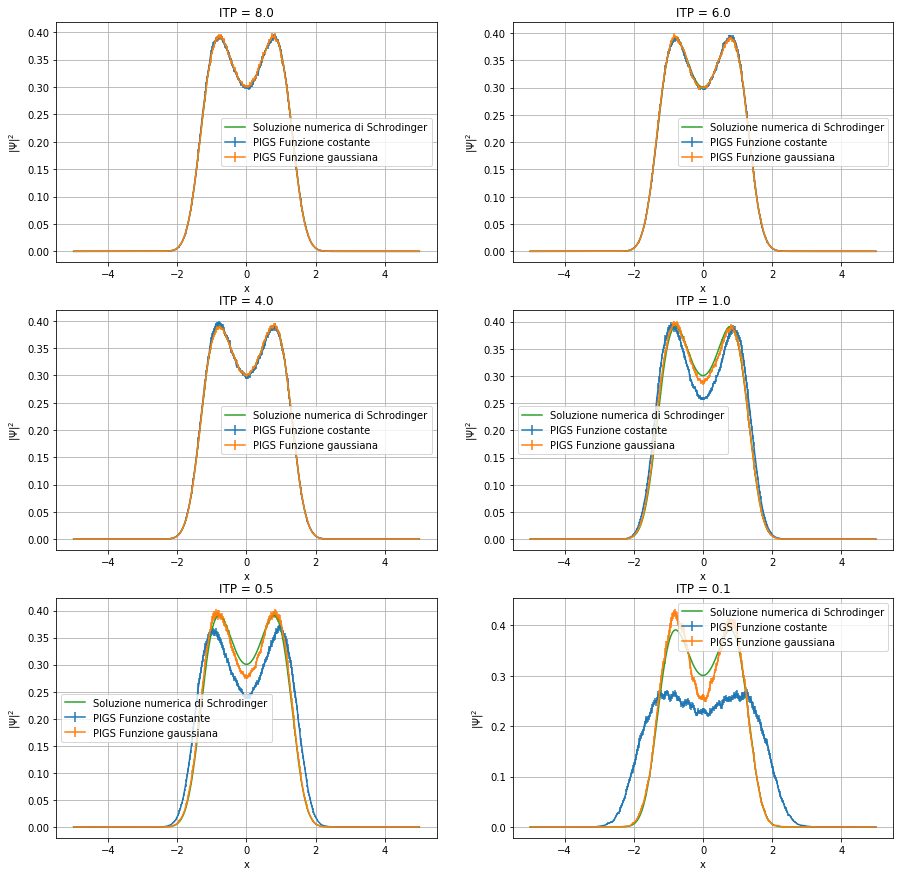

In [21]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3,2)

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=8/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=8/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[0][0].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[0][0].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[0][0].set_title('ITP = 8.0')

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=6/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=6/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[0][1].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[0][1].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[0][1].set_title('ITP = 6.0')

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=4/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=4/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[1][0].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[1][0].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[1][0].set_title('ITP = 4.0')

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[1][1].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[1][1].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[1][1].set_title('ITP = 1.0')

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=0.5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=0.5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[2][0].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[2][0].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[2][0].set_title('ITP = 0.5')

xc, yc, errc = np.loadtxt("./QMC_1D/TZeroConst/itp=0.1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errg = np.loadtxt("./QMC_1D/TZeroGauss/itp=0.1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax[2][1].errorbar(xc, yc, yerr=errc, label='PIGS Funzione costante')
ax[2][1].errorbar(xg, yg, yerr=errg, label='PIGS Funzione gaussiana')
ax[2][1].set_title('ITP = 0.1')

for i in range(3):
    for j in range(2):
        ax[i][j].set_xlabel('x')
        ax[i][j].set_ylabel('$|\Psi|^2$')
        ax[i][j].plot(x,(psi[0])**2, label='Soluzione numerica di Schrodinger')
        ax[i][j].grid(True)
        ax[i][j].legend()       
plt.show()

Per mantenere la stessa precisione, possiamo ridurre l'ITP a $\tau=1$ per la funzione gaussiana doppia con i parametri variazionali $\mu$ e $\sigma$ ottimizzati, e $\tau=2$ per la funzione d'onda di prova costante.

#### Algoritmo PIMC
Come lavoro finale dobbiamo usare il codice a T finita per valutare come si trasforma il risultato se si osserva questo sistema monodimensionale a una temperatura finita, quindi preparato in uno stato miscela in cui c'è una certa probabilità di occupare lo stato fondamentale e via via gli stati eccitati con energia sempre più alta che è rappresentata dal peso di Boltzmann. Più l'energia sale più sarà bassa la probabilità di occuparli,ma non uguale a zero se la temperatura è finita. 
Abbiamo utilizzato l'algoritmo PIMC (T>0,finita) per studiare come cambia la funzione d'onda gaussiana per lo stato fondamentale all'aumentare della temperatura.

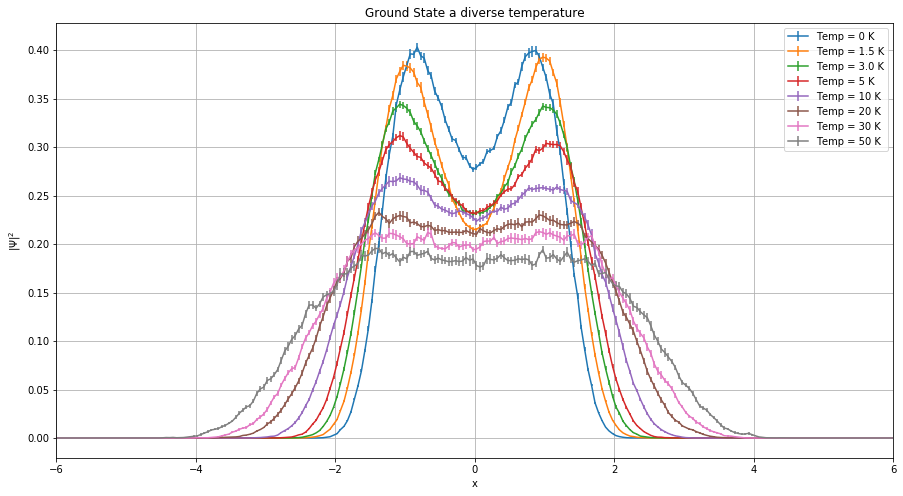

In [23]:
plt.rcParams['figure.figsize'] = [15, 8]

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=0/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 0 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=1.5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 1.5 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=3/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 3.0 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 5 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=10/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 10 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=20/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 20 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=30/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 30 K')

x, y, err = np.loadtxt("./QMC_1D/Tfinita/T=50/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=err, label='Temp = 50 K')

plt.xlim([-6.0, 6.0])
plt.title('Ground State a diverse temperature')
plt.xlabel('x')
plt.ylabel('$|\Psi|^2$')
plt.legend()
plt.grid(True)
plt.show()

A T=0 K il sistema si trova in uno stato fondamentale "perfetto", la funzione d'onda dello stato fondamentale rappresenta una densità di probabilità, quindi in corrispondenza dei massimi della funzione d'onda abbiamo probabilità massima di trovare la particella quantistica mentre in corrisun intorno del minimo della funzione d'onda si ha probabilità massima di trovare la particella quantistica: man mano che la temperatura aumenta invece, l'energia cinetica del sistema aumenta , quindi a causa delle "fluttuazioni" del sistema diventa più difficile localizzare la particella. Questo comporta che la larghezza delle due gaussiane aumenti e il minimo della funzione densità di probabilità sparisca.

### Supplemental material
E' possibile considerare la funzione d'onda e discretizzarne il suo supporto trasformandolo in un vettore di punti: un campionamento delle posizioni della funzione d'onda su una griglia equispaziata a distanza dx, trasformiamo quindi la funzione d'onda in un vettore di valori complessi discreto (in questo caso è a valori reali).
    $$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

Quindi l'equazione di Schrodinger agli autovalori 
$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

può essere approssimata da un'equazione di Schrodinger matriciale discreta dove le derivate prime nel punto $x_{i}$ e $x_{i+1}$ e le derivate tra i punti $x_{i}$ e $x_{i-1}$ possono essere approssimate da :

$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Possiamo quindi discretizzare le derivate secondo nel modo seguente:
    
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

Alla fine otteniamo:
    
    
$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$


Per risolvere l'equazione di Schrödinger indipendente dal tempo dobbiamo quindi trovare autostati e autovalori della matrice appena ottenuta.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


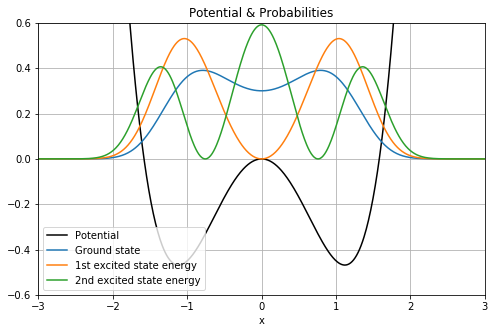

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label="Ground state")
plt.plot(x,(psi[1])**2,label="1st excited state energy")
plt.plot(x,(psi[2])**2,label="2nd excited state energy")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()